# Alumno: Borja Esteve Molner

<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">mIA3</h1></font>
<font color="#6E6E6E"><h2 align="left">Tarea Evaluable. Python.</h2></font>

#### Juan Gómez-Sanchis

**Ejercicio 1. (2 puntos)** La criba de Eratóstenes es un método ideado por Eratóstenes, para conseguir los números primos entre el 1 y un determinado número entero n. Este ejercicio permite poner en práctica muchas de las sentencias de control que hemos visto.


La criba de Eratostenes se puede programar como un algoritmo que consiste en formar  una tabla con todos los números naturales comprendidos entre 2 y n,  se van tachando los números que no son primos de la siguiente manera:

* Comenzando por el 2 (considerado primo), se tachan todos sus múltiplos.
* Comenzando de nuevo, cuando se encuentra un número entero que no ha sido tachado, ese número es declarado primo, y se procede a tachar todos sus múltiplos.
* El proceso se repite iterativamente. El proceso termina cuando el cuadrado del siguiente número confirmado como primo es mayor que n.

Con todo esto,

* Crea una función denominada `Eratostenes(n)`, que devuelva los número primos inferiores o iguales a n.

* El tipo computacional de n es entero, modifica la función anterior `Eratostenes_Err` y crea un nueva función  para que si se introduce un valor real como argumento de la función, no devuelva error y  muestre un mensaje por pantalla informando al usuario de que el argumento sea entero.

In [22]:
def Eratostenes(n):
  primos = [True] * (n+1)
  p = 2

  while p <= n:
    if primos[p] == True:
      for i in range(p*p,n+1,p):
        primos[i] = False

    p += 1

  primos = [i for i in range(2, n + 1) if primos[i]]
  return primos


n = 10
resultado = Eratostenes(n)
print(resultado)



[2, 3, 5, 7]


In [23]:
#Solución 2
def Eratostenes(n):
  if not isinstance(n, int) or n <= 0:
      raise ValueError("El valor de 'n' debe ser un entero positivo.")
  primos = [True] * (n+1)
  p = 2

  while p <= n:
    if primos[p] == True:
      for i in range(p*p,n+1,p):
        primos[i] = False

    p += 1

  primos = [i for i in range(2, n + 1) if primos[i]]
  return primos


n = 7.8
resultado = Eratostenes(n)
print(resultado)


ValueError: ignored

**Ejercicio 2. (2 punto)** Crea una array 8x3 con los enteros entre 10 y 34 de uno en uno. Después crea 4 nuevos arrays 2x3 partiendo el array original de dos en dos filas.

In [25]:
import numpy as np

primer_array = np.arange(10,34,1)
primer_array = primer_array.reshape(8,3)

array_spliteado = np.split(primer_array,4)
print(array_spliteado)



[array([[10, 11, 12],
       [13, 14, 15]]), array([[16, 17, 18],
       [19, 20, 21]]), array([[22, 23, 24],
       [25, 26, 27]]), array([[28, 29, 30],
       [31, 32, 33]])]


**Ejercicio 3. (2 punto)** Crea el siguiente array de numpy:


[[34,43,73],[82,22,12],[53,94,66]]

Calcula:

* El máximo por filas
* El mínimo por columnas
* La media por columnas
* La desviación típica por filas


In [31]:
#Solución
array = np.array([[34,43,73],[82,22,12],[53,94,66]])

max_por_fila = np.max(array, axis=1)
min_col = np.min(array,axis = 0)
mean_col = np.mean(array,axis = 0)
desv_filas = np.std(array, axis = 1)

print(f'El máximo por filas es: {max_por_fila}')
print(f'El minimo por columna es {min_col}')
print(f'La media por columna es {mean_col}')
print(f'La desviación estándar por fila es {desv_filas}')


El máximo por filas es: [73 82 94]
El minimo por columna es [34 22 12]
La media por columna es [56.33333333 53.         50.33333333]
La desviación estándar por fila es [16.673332   30.91206165 17.10750323]


**Ejercicio 5. (2 puntos)**

En matemáticas, la pseudoinversa $A^+$ de una matriz $A$ es una generalización de la matriz inversa. Un uso común de la pseudoinversa es el de encontrar una solución de «ajuste óptimo» (por mínimos cuadrados) de un sistema de ecuaciones lineales que no posee solución única. Otro uso es hallar la solución de norma mínima (euclídea) de un sistema de ecuaciones lineales con múltiples soluciones.

La pseudoinversa $A^+=VS^{-1}U^t$ se obtiene a través de la descomposición en valores singulares (SVD) de la matriz $A=USV^t$. Utilizarás la función  de numpy apropiada  para obtener la descomposicion SVD de la matriz $A=USV^t$.

* Determina la matriz $S$.
* Comprueba que $A=USV^t$
* Comprueba que no se cumple $AA^+=I$**. Es decir $A^+$ no es la matriz inversa $A^{-1}$.
* Comprueba que se cumple $AA^+A=A$

_Nota: I es la matriz unidad._  


In [35]:
#Solución 1
A = np.array([[1,2,3],[4,5,6],[17,22,81]])

In [39]:
#Solución 2
U, S, Vh = np.linalg.svd(A, full_matrices=True)
print(U.shape, S.shape, Vh.shape)
np.allclose(A, np.dot(U[:, :3] * S, Vh)) # Esto compara la matriz A con la descomposición, como da TRUE, se comprueba que A = USVt

(3, 3) (3,) (3, 3)


True

In [54]:
#Solución 3

Sinv = np.diag(1/S)

pseudoA = np.dot(np.transpose(Vh),np.dot(Sinv,np.transpose(U)))

print(f'Pseudoinversa calculada por pasos: {pseudoA}')

###### comparamos con la función de numpy para calcular la pseudo inversa #######

print(f'Pseudoinversa calculada con método numpy: {np.linalg.pinv(A)}')

##### Una vez comprobado que está bien calculada la Pseudoinversa, pasamos a comprobar la condición del ejerrcicio######

print(f'Comprobacion de que no se obtiene la identidad: {np.dot(A,pseudoA)}')

Pseudoinversa calculada por pasos: [[-1.68518519  0.59259259  0.01851852]
 [ 1.37037037 -0.18518519 -0.03703704]
 [-0.01851852 -0.07407407  0.01851852]]
Pseudoinversa calculada con método numpy: [[-1.68518519  0.59259259  0.01851852]
 [ 1.37037037 -0.18518519 -0.03703704]
 [-0.01851852 -0.07407407  0.01851852]]
Comprobacion de que no se obtiene la identidad: [[ 1.00000000e+00 -1.69309011e-15 -1.97758476e-16]
 [ 1.36210487e-14  1.00000000e+00 -1.45716772e-16]
 [ 6.47572274e-14 -1.34614542e-14  1.00000000e+00]]


In [56]:
#Solución 4
product = np.dot(A, pseudoA)

resultado = np.dot(product,A)


igual = np.allclose(resultado, A)

print(f'Como el resultado es {igual} se cumple la condición')

Como el resultado es True se cumple la condición


**Ejercicio 6. (2 puntos)** Carga el dataset `Coches_dataset_jgx_I.csv` empleando la librería `pandas` y sus funciones de importación.

* Una vez cargado, visualiza las 5 primeras muestras del data frame.
* Averigua el número de muestras del data frame.
* Crea los gráficos de scattering necesarios dispuestos en un layout subplot donde se muestren las relaciones entre las variables de tipo float del dataset 2 a 2.



In [60]:
#Solución 1
import pandas as pd
dataset = pd.read_csv("Coches_dataset_jgx_I.csv", sep = ';')

In [70]:
#Solución 2
dataset.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450


In [65]:
#Solucion 3
muestras = dataset.shape[0]
print(f'El número de muestras del dataset es: {muestras}')

El número de muestras del dataset es: 61


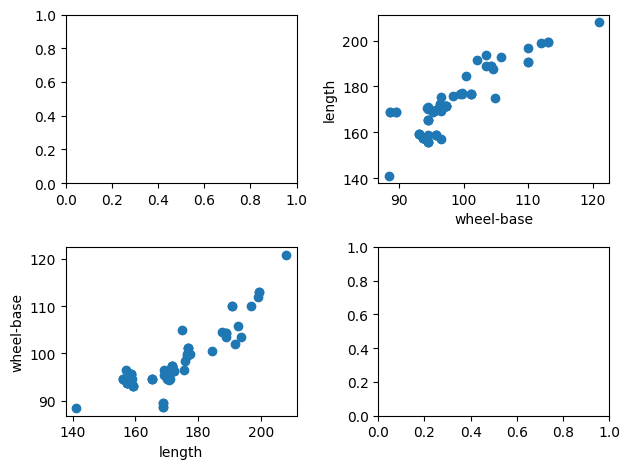

In [68]:
#Solucion 4
import matplotlib.pyplot as plt

colum_float = dataset.select_dtypes(include=['float64']).columns
num_col = len(colum_float)

filas = num_col
col = num_col

fig,axs = plt.subplots(filas,col)

for i,col1 in enumerate(colum_float):
  for j,col2 in enumerate(colum_float):
    if i!=j:
      axs[i, j].scatter(dataset[col1], dataset[col2])
      axs[i, j].set_xlabel(col1)
      axs[i, j].set_ylabel(col2)

plt.tight_layout()
plt.show()
